#Hackaton - Match entre pacientes y terapeutas para una terapia exitosa


#Importo librerías y leo el csv

In [452]:
import pandas as pd
import numpy as np
import seaborn as sb
from google.colab import files
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Leo el csv

In [453]:
df_data=pd.read_csv("/content/drive/MyDrive/Data Science/DATA SCIENCE 2023/HACKATON/datos_terapia_251023.csv")

## En df_data almaceno todo el data frame y renombro las columnas.

In [454]:
df_data.columns
df_data.rename(columns={'Marca temporal':'Marca',
                            'Año de nacimiento': 'Año_Nac',
                            'Género': 'Genero',
                            '¿Dónde vivís? Ej: Belgrano, Berazategui, etc.': 'Localidad',
                            '¿Hiciste terapia alguna vez?': 'Hizo_Terapia',
                            '¿Que edad tenías cuando empezaste la terapia?': 'Edad_Terapia',
                            '¿Cuánto tiempo duró o cuánto tiempo llevas haciendo terapia? (En años)': 'Duracion_Terapia',
                            'Sexo del terapeuta':'Sexo_Psi',
                            'Edad aproximada de tu terapeuta cuando empezaste la terapia': 'Edad_Psi',
                            '¿Cuál es la especialidad de tu terapeuta?': 'Especialidad',
                            '¿Cuales fueron los principales factores que tuviste en cuenta para elegir tu terapeuta? Ej: Edad, Sexo, Especialidad, Recomendación...': 'Factores_Eleccion',
                            '¿Podrías describir brevemente el tema más importante que trabajas o trabajaste en terapia? Ej: Depresión, fallecimiento de alguien cercano.': 'Temas_Psi',
                            '¿Crees que era el terapeuta indicado para vos?': 'Exito_Terapia',
                            '¿Estarías dispuesto a hacer terapia en el corto plazo?': 'Haria_Terapia',
                            '¿Cuáles son los principales aspectos que tendrías en cuenta para elegir un terapeuta? Ej: Sexo, edad, especialidad, recomendación.': 'Factores_El2',
                            '¿Te parecería útil una app que busque conectar un paciente con el profesional con el cual tenga la mayor probabilidad de éxito?': 'Utilidad',
                            '¿Qué otras preguntas te parece que serían relevantes?':'X1',
                            '¿Por qué? Ej: Diferencia de edad; me hacía buenas preguntas; me dejaba hablar y me sabía escuchar; hubiese preferido que fuera de otro sexo; etc. ': 'Factores_exito',
                            '¿Podrías darnos más detalles? Ej: Trans':'No_binario'},
               inplace=True)

# Limpieza del dataset

In [455]:
df_data.loc[df_data['Utilidad'] == "Sí", 'Utilidad']=1
df_data.loc[df_data['Utilidad'] == "Si", 'Utilidad']=1
df_data.loc[df_data['Utilidad'] == "No", 'Utilidad']=0

df_data.loc[df_data['Genero'] == "Masculino", 'Genero']=1
df_data.loc[df_data['Genero'] == "Femenino", 'Genero']=0

df_data.loc[df_data['Hizo_Terapia'] == "Sí", 'Hizo_Terapia']=1
df_data.loc[df_data['Hizo_Terapia'] == "Si", 'Hizo_Terapia']=1
df_data.loc[df_data['Hizo_Terapia'] == "No", 'Hizo_Terapia']=0

df_data.loc[df_data['Sexo_Psi'] == "Masculino", 'Sexo_Psi']=1
df_data.loc[df_data['Sexo_Psi'] == "Femenino", 'Sexo_Psi']=0

df_data.loc[df_data['Exito_Terapia'] == "Si", 'Exito_Terapia']=1
df_data.loc[df_data['Exito_Terapia'] == "No", 'Exito_Terapia']=0
df_data.loc[df_data['Exito_Terapia'] == "Tal vez", 'Exito_Terapia']=0.5


df_data.loc[df_data['Año_Nac'] == "1197", 'Año_Nac']=1997
df_data.loc[df_data['Año_Nac'] == "10/8/1995", 'Año_Nac']=1995
df_data.loc[df_data['Año_Nac'] == "8/1/1988", 'Año_Nac']=1988
df_data.loc[df_data['Año_Nac'] == "24 junio 2000", 'Año_Nac']=2000

df_data.loc[df_data['Utilidad'] == "Sí", 'Utilidad']=1
df_data.loc[df_data['Utilidad'] == "Si", 'Utilidad']=1
df_data.loc[df_data['Utilidad'] == "No", 'Utilidad']=0

df_data.loc[df_data['Genero'] == "Masculino", 'Genero']=1
df_data.loc[df_data['Genero'] == "Femenino", 'Genero']=0

df_data.loc[df_data['Hizo_Terapia'] == "Sí", 'Hizo_Terapia']=1
df_data.loc[df_data['Hizo_Terapia'] == "Si", 'Hizo_Terapia']=1
df_data.loc[df_data['Hizo_Terapia'] == "No", 'Hizo_Terapia']=0

df_data.loc[df_data['Sexo_Psi'] == "Masculino", 'Sexo_Psi']=1
df_data.loc[df_data['Sexo_Psi'] == "Femenino", 'Sexo_Psi']=0
df_data.loc[df_data['Sexo_Psi'] == "1 masculino y 1 femenino", 'Sexo_Psi']=0

df_data.loc[df_data['Exito_Terapia'] == "Si", 'Exito_Terapia']=1
df_data.loc[df_data['Exito_Terapia'] == "Sí", 'Exito_Terapia']=1
df_data.loc[df_data['Exito_Terapia'] == "No", 'Exito_Terapia']=0
df_data.loc[df_data['Exito_Terapia'] == "Tal vez", 'Exito_Terapia']=0.5

df_data.loc[df_data['Edad_Terapia'] == "6 y 32 años", 'Edad_Terapia']=32
df_data.loc[df_data['Edad_Terapia'] == "14 años", 'Edad_Terapia']=14
df_data.loc[df_data['Edad_Terapia'] == "25 años", 'Edad_Terapia']=25


df_data.loc[df_data['Duracion_Terapia'] == "3 años", 'Duracion_Terapia']=3
df_data.loc[df_data['Duracion_Terapia'] == "Hace años, por un par de semanas en cada año de corrido", 'Duracion_Terapia']=0.01
df_data.loc[df_data['Duracion_Terapia'] == "Medio año", 'Duracion_Terapia']=0.5
df_data.loc[df_data['Duracion_Terapia'] == "6 meses ", 'Duracion_Terapia']=0.5
df_data.loc[df_data['Duracion_Terapia'] == "1 mes ", 'Duracion_Terapia']=0.083
df_data.loc[df_data['Duracion_Terapia'] == "Hice 1 año y medio de terapia", 'Duracion_Terapia']=1.5
df_data.loc[df_data['Duracion_Terapia'] == "1 año y medio ", 'Duracion_Terapia']=1.5
df_data.loc[df_data['Duracion_Terapia'] == "2 años", 'Duracion_Terapia']=2
df_data.loc[df_data['Duracion_Terapia'] == "2 años con mi psico ", 'Duracion_Terapia']=2
df_data.loc[df_data['Duracion_Terapia'] == "2 años ", 'Duracion_Terapia']=2
df_data.loc[df_data['Duracion_Terapia'] == "2 sesiones", 'Duracion_Terapia']=0.04
df_data.loc[df_data['Duracion_Terapia'] == "8 meses ", 'Duracion_Terapia']=0.667
df_data.loc[df_data['Duracion_Terapia'] == "34 años interrumpidos", 'Duracion_Terapia']=34
df_data.loc[df_data['Duracion_Terapia'] == "1,5", 'Duracion_Terapia']=1.5
df_data.loc[df_data['Duracion_Terapia'] == "0,5", 'Duracion_Terapia']=0.5
df_data.loc[df_data['Duracion_Terapia'] == "2,5", 'Duracion_Terapia']=2.5
df_data.loc[df_data['Duracion_Terapia'] == "3,5", 'Duracion_Terapia']=3.5
df_data.loc[df_data['Duracion_Terapia'] == "0,083", 'Duracion_Terapia']=0.083
df_data.loc[df_data['Duracion_Terapia'] == "0,8", 'Duracion_Terapia']=0.8
df_data.loc[df_data['Duracion_Terapia'] == "1 año", 'Duracion_Terapia']=1
df_data.loc[df_data['Duracion_Terapia'] == "6 meses ", 'Duracion_Terapia']=0.5


df_data['Hizo_Terapia']=df_data['Hizo_Terapia'].astype(int)
df_data['Edad_Terapia']=df_data['Edad_Terapia'].astype(float)
df_data['Utilidad']=df_data["Utilidad"].astype(int)
df_data['Genero']=df_data["Genero"].astype(int)
df_data['Duracion_Terapia']=df_data['Duracion_Terapia'].astype(float)
df_data['Año_Nac']=df_data['Año_Nac'].astype(int)



df_data['Utilidad']=df_data["Utilidad"].astype(int)
df_data['Genero']=df_data["Genero"].astype(int)

df_data.groupby('Genero').sum()

<ipython-input-455-9b65da80611e>:85: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_data.groupby('Genero').sum()


,Año_Nac,Hizo_Terapia,Edad_Terapia,Duracion_Terapia,Utilidad,No_binario
Genero,,,,,,
0,269173,112,2446.0,359.143,126,0.0
1,288988,93,2062.0,242.240,138,0.0


En df1 solo voy a guardar las columnas que me interesan. En Pacientes voy a guardar solo aquellos que hayan hecho terapia.

In [456]:
df1=df_data
df1=df1.drop(["Marca","Localidad","Factores_Eleccion", "Haria_Terapia", "Factores_El2", "Utilidad", "X1", "No_binario", 'Factores_exito'], axis=1)

In [457]:
#df1['Hizo_Terapia'].astype(int)
#df1.drop(['Hizo_Terapia']==0, axis=0)
Pacientes = df1[df1['Hizo_Terapia']>0] # Algunos valores de este feature son nulos
Pacientes['Sexo_Psi']=Pacientes['Sexo_Psi'].astype(int)

<ipython-input-457-3b71872c6791>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pacientes['Sexo_Psi']=Pacientes['Sexo_Psi'].astype(int)


Sigo limpiando la base. Tengo edades con decimales y necesito hacer categorica la variable Especialidad.

In [458]:
Pacientes['Año_Nac'].astype(int)
Pacientes['Edad_Terapia'].astype(float)
Pacientes['Duracion_Terapia'].astype(float)
Pacientes.loc[Pacientes['Edad_Psi'] == "28,5", 'Edad_Psi']=29
Pacientes.loc[Pacientes['Edad_Psi'] == "35-40", 'Edad_Psi']=38
Pacientes.loc[Pacientes['Edad_Psi'] == "60 años", 'Edad_Psi']=60
Pacientes['Edad_Psi']=Pacientes['Edad_Psi'].astype(int)
Pacientes['Exito_Terapia']=Pacientes['Exito_Terapia'].astype(float)

<ipython-input-458-8c983343896f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pacientes['Edad_Psi']=Pacientes['Edad_Psi'].astype(int)
<ipython-input-458-8c983343896f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pacientes['Exito_Terapia']=Pacientes['Exito_Terapia'].astype(float)


In [459]:
Pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 278
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año_Nac           205 non-null    int64  
 1   Genero            205 non-null    int64  
 2   Hizo_Terapia      205 non-null    int64  
 3   Edad_Terapia      205 non-null    float64
 4   Duracion_Terapia  205 non-null    float64
 5   Sexo_Psi          205 non-null    int64  
 6   Edad_Psi          205 non-null    int64  
 7   Especialidad      205 non-null    object 
 8   Temas_Psi         192 non-null    object 
 9   Exito_Terapia     205 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 17.6+ KB


In [460]:
Pacientes['Especialidad'].unique()

array(['Psicoanálisis', 'No se', 'Cognitivo', 'Humanístico',
       'Gestalt Humanista', 'Cognitivo - Conductual',
       'psicoterapia sin especialización', ' NI idea',
       'Biodecodificacion', 'No sé ',
       'Sería más integral. No se casó con ninguna teoría y eso es lo que más me gusta. ',
       'No me se dar cuenta', 'No lo se', 'No lo sé ', 'Sistémica ',
       'Ni idea', 'Sistémico', 'No estoy segura, creo que psicoanálisis ',
       'Adicciones', 'Psicoterapia corporal', 'De pareja'], dtype=object)

## Especialidades
Otros, 0 |
Psicoanalisis, 1 |
Cognitivo conductual, 2 |

In [461]:
Pacientes.loc[Pacientes['Especialidad'] == "Psicoanálisis", 'Especialidad']=1
Pacientes.loc[Pacientes['Especialidad'] == "psicoterapia sin especialización", 'Especialidad']=1
Pacientes.loc[Pacientes['Especialidad'] == "Sería más integral. No se casó con ninguna teoría y eso es lo que más me gusta. ", 'Especialidad']=1
Pacientes.loc[Pacientes['Especialidad'] == "Sistémica ", 'Especialidad']=2
Pacientes.loc[Pacientes['Especialidad'] == "Sistémico", 'Especialidad']=2
Pacientes.loc[Pacientes['Especialidad'] == "Cognitivo", 'Especialidad']=2
Pacientes.loc[Pacientes['Especialidad'] == "Cognitivo - Conductual", 'Especialidad']=2
Pacientes.loc[Pacientes['Especialidad'] == "Gestalt Humanista", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "Humanístico", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "Biodecodificacion", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "Ni idea", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "Ni idea ", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == " NI idea", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "No lo se", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "No lo sé ", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "No me se dar cuenta", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "No se", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "No sé", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "No sé ", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "No estoy segura, creo que psicoanálisis ", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "Psicoterapia corporal", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "De pareja", 'Especialidad']=0
Pacientes.loc[Pacientes['Especialidad'] == "Adicciones", 'Especialidad']=0

Pacientes['Especialidad']=Pacientes['Especialidad'].astype(int)

<ipython-input-461-a8641df4c661>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pacientes['Especialidad']=Pacientes['Especialidad'].astype(int)


In [462]:
Pacientes['Temas_Psi'].unique()

array([nan, 'Depresión, represión', 'Relación personal',
       'Falta de confianza', 'Ansiedad y panico',
       'Depresión, fallecimiento de alguien cercano, ansiedad ',
       'Problemas de personalidad', 'Miedo a que muera un familiar ',
       'Ansiedad', 'Represion emocional', 'Fallecimiento', 'Autoestima',
       'Autoexigencia', 'Depresión',
       'Autoexigencia y falta de motivación personal y profesional. ',
       'Reacciones y formas de manejarse', 'patrones vinculares',
       'Demasiados:\n- Vinculo con mi papá\n- Violencia en casa\n- Relaciones Tóxicas\n- Muerte\n- Autoconfianza\n',
       'Duelo', 'ansiedad', 'Imagen corporal',
       'ansiedad por falta de cercanía con mi entorno', 'relaciones',
       'Desapego', 'Convivencia ',
       'Relación con mi papá/ con exigencias ',
       'Problemas alimenticios, problemas familiares, ruptura.',
       'Autonocimiento', 'Ataque de panico',
       'Miedos con respecto a mis emociones y la forma de expresarme con ellos',
   

##Categorias de temas tratados

Categoria,Referencia
0,vacío
1,ansiedad
2,depresión
3,pérdida de familiar / ser querido
4,autoexigencia
5,autoestima
6,ataques de pánico
7,familia / problemas familiares
8,separación/ruptura amorosa
9,separación/divorcio de padres
10,falta de confianza
11,"relaciónes (personal, amorosa, amistades, etc)"
12,problemas/trastornos alimenticios
13,estrés/problemas universitario/s
14,autolesiones
15,estrés post traumático
16,adicciones
17,estrés
18,inseguridades
19,angustia
20,maternidad / post parto
21,cambios grandes
22,toma de decisiones
23,sexo/sexualidad
24,manejo de las emociones
25,profesion / trabajo
26,personalidad
27,otro/s
```


In [463]:
Pacientes=Pacientes.fillna(0)
Pacientes.loc[Pacientes['Temas_Psi'] == "-", 'Temas_Psi']=0


Pacientes.loc[Pacientes['Temas_Psi'] == "Ansiedad y panico", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] == "Ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] == "ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] == "ansiedad por falta de cercanía con mi entorno", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] == "Ansiedad y baja de autoestima ", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="ansiedad, depresión, tept, toc, autoestima", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad y estrés ", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad y cuestiones personales del día a día ", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ataques de ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Transición por un momento difícil\nAnsiedad depresión ", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Insatisfacción general. Ansiedad. Vocación. ", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad y perfeccionismo", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad ", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad ", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad, ataques de angustia, relaciones/vínculos afectivos y familiares", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad, Falta de diciplina ", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad y como controlarla", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad, limites", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad ", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ataques de ansiedad", 'Temas_Psi']=1
Pacientes.loc[Pacientes['Temas_Psi'] =="Ansiedad, depresión, y mucho más 🪴", 'Temas_Psi']=1

Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión, represión", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión, fallecimiento de alguien cercano, ansiedad ", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresion ", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="depresion", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresion", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión,ataques de panico, separación,  familia...", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión ", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión y ansiedad", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="depresion y ansiedad", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión, Ansiedad social", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión / relación ", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión ", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="depresión, autoestima", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Leve depresión fue su diagnóstico al comienzo de la terapia", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión post ruptura.", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión, ideas suicidas y proceso de hijo adolescente con mismos temas y transición de género", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión, muerte de mi papá y divorcio con el papá de mi hijo.", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresion y relaciones interpersonales", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión ", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresion", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión ", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión ", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión, ruptura, ansiedad", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresion", 'Temas_Psi']=2
Pacientes.loc[Pacientes['Temas_Psi'] =="Depresión pareja separación relaciones tóxicas límites desarollo personal ", 'Temas_Psi']=2

Pacientes.loc[Pacientes['Temas_Psi'] =="Fallecimiento", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="Duelo", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="Fallecimiento de alguien cercano", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="Pérdida familiar", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="Fallecimiento de familiares, sit de abuso.", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="fallecimiento de alguien cercano, autoestima ", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="Fallecimiento de amigo, papá y cortar relación con novia", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="Fallecimiento de un familiar ", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="Fallecimiento de alguien cercano y enfermedad", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="Fallecimientos y problemas para interactuar con las personas", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="Fallecimiento de padre", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="fallecimiento de alguien cercano", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="Pérdida de alguien ", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="Duelo de mi papa", 'Temas_Psi']=3
Pacientes.loc[Pacientes['Temas_Psi'] =="Fallecimiento de alguien cercano", 'Temas_Psi']=3

Pacientes.loc[Pacientes['Temas_Psi'] =="Autoexigencia", 'Temas_Psi']=4
Pacientes.loc[Pacientes['Temas_Psi'] =="Autoexigencia y falta de motivación personal y profesional. ", 'Temas_Psi']=4
Pacientes.loc[Pacientes['Temas_Psi'] =="La autoexigencia, el divorcio de mis padres, el vinculo con mis padres, la valía personal, herramientas para la concentración en el presente", 'Temas_Psi']=4
Pacientes.loc[Pacientes['Temas_Psi'] =="Autoexigencia", 'Temas_Psi']=4
Pacientes.loc[Pacientes['Temas_Psi'] =="Autoexigencia", 'Temas_Psi']=4

Pacientes.loc[Pacientes['Temas_Psi'] =="Autoestima", 'Temas_Psi']=5
Pacientes.loc[Pacientes['Temas_Psi'] =="Autoestima ", 'Temas_Psi']=5
Pacientes.loc[Pacientes['Temas_Psi'] =="Autoestima y pensamientos negativos", 'Temas_Psi']=5
Pacientes.loc[Pacientes['Temas_Psi'] =="Falta de confianza", 'Temas_Psi']=5

Pacientes.loc[Pacientes['Temas_Psi'] =="Ataque de panico", 'Temas_Psi']=6
Pacientes.loc[Pacientes['Temas_Psi'] =="Ataques de panico, vínculo con mis padres", 'Temas_Psi']=6
Pacientes.loc[Pacientes['Temas_Psi'] =="Ataques de pánico ", 'Temas_Psi']=6
Pacientes.loc[Pacientes['Temas_Psi'] =="Ataques de pánico ", 'Temas_Psi']=6

Pacientes.loc[Pacientes['Temas_Psi'] =="Miedo a que muera un familiar ", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="patrones vinculares", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Demasiados:\n- Vinculo con mi papá\n- Violencia en casa\n- Relaciones Tóxicas\n- Muerte\n- Autoconfianza\n", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Relación con mi papá/ con exigencias ", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Familia ", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Relaciones familiares", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="traicion de padre", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Vínculos familiares y ansiedad ", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Enfermedad de un ser querido ", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Problema familiar ", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Relaciones familiares", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Problemas familiares  ", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Familia", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Peleas familiares con mis papas ", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Problemas familiares ", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Salud de mi familia y como navegar el cambio profesional", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Traumas familiares ", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Familia y vinculos", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Relacíon conflictiva con mis padres.", 'Temas_Psi']=7
Pacientes.loc[Pacientes['Temas_Psi'] =="Familia ", 'Temas_Psi']=7

Pacientes.loc[Pacientes['Temas_Psi'] =="separación, abusos, familia ", 'Temas_Psi']=8
Pacientes.loc[Pacientes['Temas_Psi'] =="Corazón roto, desamor, angustia, frustración deportiva ", 'Temas_Psi']=8
Pacientes.loc[Pacientes['Temas_Psi'] =="Separación/divorcio", 'Temas_Psi']=8
Pacientes.loc[Pacientes['Temas_Psi'] =="Separación ", 'Temas_Psi']=8
Pacientes.loc[Pacientes['Temas_Psi'] =="Separación de pareja", 'Temas_Psi']=8
Pacientes.loc[Pacientes['Temas_Psi'] =="Separación de pareja ", 'Temas_Psi']=8
Pacientes.loc[Pacientes['Temas_Psi'] =="Ruptura amorosa", 'Temas_Psi']=8
Pacientes.loc[Pacientes['Temas_Psi'] =="duelo por separación", 'Temas_Psi']=8
Pacientes.loc[Pacientes['Temas_Psi'] =="separación, abandono", 'Temas_Psi']=8
Pacientes.loc[Pacientes['Temas_Psi'] =="Separación ", 'Temas_Psi']=8
Pacientes.loc[Pacientes['Temas_Psi'] =="Separacion/ fallecimiento de alguien cercano", 'Temas_Psi']=8
Pacientes.loc[Pacientes['Temas_Psi'] =="Ruptura amorosa, fallecimiento de familiar", 'Temas_Psi']=8

Pacientes.loc[Pacientes['Temas_Psi'] =="Divorcio de mis padres", 'Temas_Psi']=9
Pacientes.loc[Pacientes['Temas_Psi'] =="Separación de mis padres, abandono/alejamiento de uno de ellos ", 'Temas_Psi']=9
Pacientes.loc[Pacientes['Temas_Psi'] =="Separación de padres", 'Temas_Psi']=9

Pacientes.loc[Pacientes['Temas_Psi'] =="Relación personal", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="relaciones", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Convivencia ", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Trabajo las relaciones humanas y temas laborales.", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Relación de pareja fallida y relación con familiares", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Relaciones amorosas, laborales, familiares ", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="La pareja y yo mismo", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="relaciones personales", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Manejo de relaciones", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Relaciones afectivas y profesionales", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Relaciones conflictivas ", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Parejas", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Relación de pareja ", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Dificultades con parejas (mujeres)", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="El rencausar la pareja", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Personales  y pareja ", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Vida amorosa y trayectoria profesional", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="Relaciones, y trabajo", 'Temas_Psi']=11
Pacientes.loc[Pacientes['Temas_Psi'] =="La soledad; baja autoestima, humillación por parte de un pariente ", 'Temas_Psi']=11

Pacientes.loc[Pacientes['Temas_Psi'] =="Imagen corporal", 'Temas_Psi']=12
Pacientes.loc[Pacientes['Temas_Psi'] =="Problemas alimenticios, problemas familiares, ruptura.", 'Temas_Psi']=12
Pacientes.loc[Pacientes['Temas_Psi'] =="trastorno alimenticio", 'Temas_Psi']=12
Pacientes.loc[Pacientes['Temas_Psi'] =="Vínculo con la comida + encierro en pandemia y sus efectos. \nHoy hablo más de mi día a día pero inició por un mal momento emocional con esas dos cosas", 'Temas_Psi']=12
Pacientes.loc[Pacientes['Temas_Psi'] =="Problemas de alimentación y fallecimiento de un familiar", 'Temas_Psi']=12

Pacientes.loc[Pacientes['Temas_Psi'] =="Problemas en la facultad", 'Temas_Psi']=13
Pacientes.loc[Pacientes['Temas_Psi'] =="Futuro academico, exigencias familiares", 'Temas_Psi']=13

Pacientes.loc[Pacientes['Temas_Psi'] =="cómo poder expresar mis sentimientos para que no me dañen a nivel fisico", 'Temas_Psi']=14
Pacientes.loc[Pacientes['Temas_Psi'] =="Autolesiones", 'Temas_Psi']=14

Pacientes.loc[Pacientes['Temas_Psi'] =="Estrés post traumático ", 'Temas_Psi']=15
Pacientes.loc[Pacientes['Temas_Psi'] =="Sufrimiento de un Secuestro", 'Temas_Psi']=15
Pacientes.loc[Pacientes['Temas_Psi'] =="Bullying ", 'Temas_Psi']=15
Pacientes.loc[Pacientes['Temas_Psi'] =="Superacion de un trauma luego de haber sufrido un choque, auto superacion y crecimiento personal", 'Temas_Psi']=15
Pacientes.loc[Pacientes['Temas_Psi'] =="pandemia ", 'Temas_Psi']=15
Pacientes.loc[Pacientes['Temas_Psi'] =="Abusos, tda, otros temas importantes ", 'Temas_Psi']=15

Pacientes.loc[Pacientes['Temas_Psi'] =="Adiccion", 'Temas_Psi']=16
Pacientes.loc[Pacientes['Temas_Psi'] =="Adicciones, familia", 'Temas_Psi']=16

Pacientes.loc[Pacientes['Temas_Psi'] =="Estres", 'Temas_Psi']=17
Pacientes.loc[Pacientes['Temas_Psi'] =="Estrés ", 'Temas_Psi']=17

Pacientes.loc[Pacientes['Temas_Psi'] =="Inseguridades y vivir en el presente y no en el futuro ", 'Temas_Psi']=18
Pacientes.loc[Pacientes['Temas_Psi'] =="Inseguridades ", 'Temas_Psi']=18
Pacientes.loc[Pacientes['Temas_Psi'] =="Mis inseguridades ", 'Temas_Psi']=18
Pacientes.loc[Pacientes['Temas_Psi'] =="Inseguridad, ansiedad", 'Temas_Psi']=18
Pacientes.loc[Pacientes['Temas_Psi'] =="valoración personal ", 'Temas_Psi']=18
Pacientes.loc[Pacientes['Temas_Psi'] =="Inseguridad, falta de caracter", 'Temas_Psi']=18

Pacientes.loc[Pacientes['Temas_Psi'] =="Angustia, noviazgo, amistades", 'Temas_Psi']=19
Pacientes.loc[Pacientes['Temas_Psi'] =="Angustia ", 'Temas_Psi']=19
Pacientes.loc[Pacientes['Temas_Psi'] =="Angustia, vínculos ", 'Temas_Psi']=19

Pacientes.loc[Pacientes['Temas_Psi'] =="maternidad, filiación ", 'Temas_Psi']=20
Pacientes.loc[Pacientes['Temas_Psi'] =="Embarazo", 'Temas_Psi']=20

Pacientes.loc[Pacientes['Temas_Psi'] =="Mudanza, autoestima, mi lugar en la familia, empoderamiento y posicionamiento en los distintos ámbitos de mi vida. ", 'Temas_Psi']=21
Pacientes.loc[Pacientes['Temas_Psi'] =="Cambio drástico de vida, lugar de residencia, fin de una relación", 'Temas_Psi']=21

Pacientes.loc[Pacientes['Temas_Psi'] =="Toma de decisiones importantes", 'Temas_Psi']=22
Pacientes.loc[Pacientes['Temas_Psi'] =="Tomar decisiones", 'Temas_Psi']=22
Pacientes.loc[Pacientes['Temas_Psi'] =="Toma de decisiones, ansiedad, duelos y relaciones vinculares", 'Temas_Psi']=22

Pacientes.loc[Pacientes['Temas_Psi'] =="Problemas para tener sexo", 'Temas_Psi']=23
Pacientes.loc[Pacientes['Temas_Psi'] =="Sexualidad", 'Temas_Psi']=23

Pacientes.loc[Pacientes['Temas_Psi'] =="Represion emocional", 'Temas_Psi']=24
Pacientes.loc[Pacientes['Temas_Psi'] =="Reacciones y formas de manejarse", 'Temas_Psi']=24
Pacientes.loc[Pacientes['Temas_Psi'] =="Miedos con respecto a mis emociones y la forma de expresarme con ellos", 'Temas_Psi']=24
Pacientes.loc[Pacientes['Temas_Psi'] =="Frustración, autoestima y relaciónes que tenía en ese momento", 'Temas_Psi']=24
Pacientes.loc[Pacientes['Temas_Psi'] =="Control de las emociones", 'Temas_Psi']=24
Pacientes.loc[Pacientes['Temas_Psi'] =="Impaciencia/Carácter", 'Temas_Psi']=24
Pacientes.loc[Pacientes['Temas_Psi'] =="Lidiar con la frustración, mis emociones de una manera más saludable ", 'Temas_Psi']=24
Pacientes.loc[Pacientes['Temas_Psi'] =="Estima", 'Temas_Psi']=24
Pacientes.loc[Pacientes['Temas_Psi'] =="Mi actitud frente al otro", 'Temas_Psi']=24
Pacientes.loc[Pacientes['Temas_Psi'] =="Felicidad", 'Temas_Psi']=24

Pacientes.loc[Pacientes['Temas_Psi'] =="Hiperactividad", 'Temas_Psi']=25
Pacientes.loc[Pacientes['Temas_Psi'] =="rutina", 'Temas_Psi']=25
Pacientes.loc[Pacientes['Temas_Psi'] =="Profesion, depresión, pareja", 'Temas_Psi']=25
Pacientes.loc[Pacientes['Temas_Psi'] =="El trabajo", 'Temas_Psi']=25

Pacientes.loc[Pacientes['Temas_Psi'] =="Problemas de personalidad", 'Temas_Psi']=26
Pacientes.loc[Pacientes['Temas_Psi'] =="Desapego", 'Temas_Psi']=26
Pacientes.loc[Pacientes['Temas_Psi'] =="Autonocimiento", 'Temas_Psi']=26
Pacientes.loc[Pacientes['Temas_Psi'] =="Mi soberbia", 'Temas_Psi']=26
Pacientes.loc[Pacientes['Temas_Psi'] =="Empatia y autoconocimiento ", 'Temas_Psi']=26
Pacientes.loc[Pacientes['Temas_Psi'] =="Aspectos de mi personalidad que no me gustan", 'Temas_Psi']=26
Pacientes.loc[Pacientes['Temas_Psi'] =="Trastorno limite de personalidad", 'Temas_Psi']=26
Pacientes.loc[Pacientes['Temas_Psi'] =="Personalidad rígida ", 'Temas_Psi']=26
Pacientes.loc[Pacientes['Temas_Psi'] =="Fortalecerme", 'Temas_Psi']=26
Pacientes.loc[Pacientes['Temas_Psi'] =="Problemas para enfrentar", 'Temas_Psi']=26

Pacientes.loc[Pacientes['Temas_Psi'] =="Varios", 'Temas_Psi']=27
Pacientes.loc[Pacientes['Temas_Psi'] =="Deporte", 'Temas_Psi']=27
Pacientes.loc[Pacientes['Temas_Psi'] =="Problemas para dormir", 'Temas_Psi']=27
Pacientes.loc[Pacientes['Temas_Psi'] =="Descontrol ", 'Temas_Psi']=27
Pacientes.loc[Pacientes['Temas_Psi'] =="La vida misma", 'Temas_Psi']=27
Pacientes.loc[Pacientes['Temas_Psi'] =="Política y la existencia ", 'Temas_Psi']=27

Pacientes['Temas_Psi']=Pacientes['Temas_Psi'].astype(int)

In [464]:
Pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 278
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año_Nac           205 non-null    int64  
 1   Genero            205 non-null    int64  
 2   Hizo_Terapia      205 non-null    int64  
 3   Edad_Terapia      205 non-null    float64
 4   Duracion_Terapia  205 non-null    float64
 5   Sexo_Psi          205 non-null    int64  
 6   Edad_Psi          205 non-null    int64  
 7   Especialidad      205 non-null    int64  
 8   Temas_Psi         205 non-null    int64  
 9   Exito_Terapia     205 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 17.6 KB


#Analisis exploratorio del dataset

array([[<Axes: title={'center': 'Año_Nac'}>,
        <Axes: title={'center': 'Genero'}>,
        <Axes: title={'center': 'Hizo_Terapia'}>],
       [<Axes: title={'center': 'Edad_Terapia'}>,
        <Axes: title={'center': 'Duracion_Terapia'}>,
        <Axes: title={'center': 'Sexo_Psi'}>],
       [<Axes: title={'center': 'Edad_Psi'}>,
        <Axes: title={'center': 'Especialidad'}>,
        <Axes: title={'center': 'Temas_Psi'}>],
       [<Axes: title={'center': 'Exito_Terapia'}>, <Axes: >, <Axes: >]],
      dtype=object)

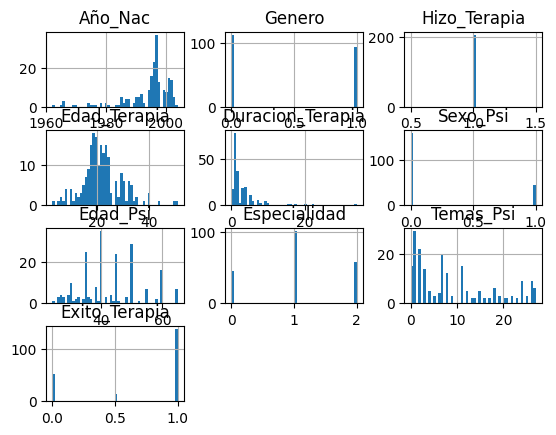

In [465]:
Pacientes.hist(bins=50)

In [466]:
Pacientes.describe()

,Año_Nac,Genero,Hizo_Terapia,Edad_Terapia,Duracion_Terapia,Sexo_Psi,Edad_Psi,Especialidad,Temas_Psi,Exito_Terapia
count,205.000000,205.000000,205.0,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1994.165854,0.453659,1.0,21.990244,2.933576,0.219512,42.936585,1.058537,9.282927,0.707317
std,7.938600,0.499067,0.0,7.361792,3.877529,0.414929,9.840437,0.711590,8.598789,0.436895
min,1962.000000,0.000000,1.0,3.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000
25%,1992.000000,0.000000,1.0,18.000000,1.000000,0.000000,35.000000,1.000000,2.000000,0.000000
50%,1996.000000,0.000000,1.0,21.000000,2.000000,0.000000,40.000000,1.000000,7.000000,1.000000
75%,1999.000000,1.000000,1.0,25.000000,4.000000,0.000000,50.000000,2.000000,15.000000,1.000000
max,2004.000000,1.000000,1.0,51.000000,34.000000,1.000000,65.000000,2.000000,27.000000,1.000000


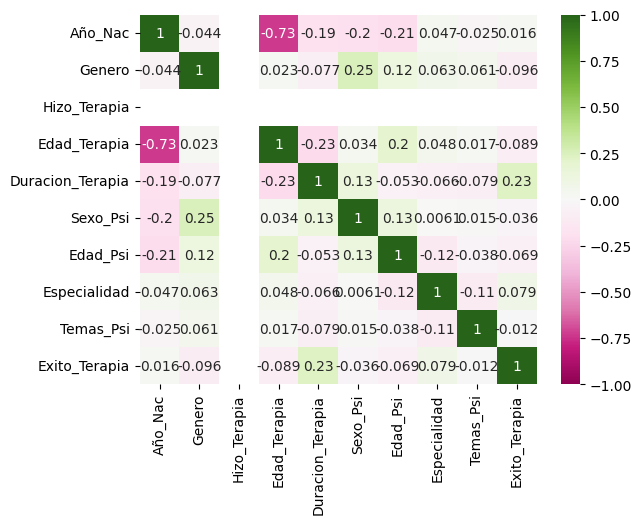

In [467]:
Pacientes_corr=Pacientes.corr()
sns.heatmap(Pacientes_corr, annot=True, vmin=-1, vmax=1, cmap="PiYG") # Divergent palette
plt.show()

# Modelos para determinar la especialidad del terapeuta


In [468]:
X = Pacientes.drop(['Especialidad', 'Hizo_Terapia'], axis=1)
y = Pacientes['Especialidad'].copy() # Reservamos el valor original (para luego de la visualizacion)

In [469]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [470]:
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import cross_validate

y = to_categorical(y)
#X_train, X_test, y_train, y_test = cross_validate.train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 123, test_size=0.4)

In [471]:
y.shape

(205, 3)

##KNN

In [472]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# Instanciamos el modelo.
knn_reg_model = KNeighborsRegressor(n_neighbors=3, p=2)
knn_reg_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [473]:
# Calculamos las predicciones del modelo sobre los datos de entrenamiento
y_train_predicted_knn = knn_reg_model.predict(X_train)
# Y sobre los datos de testeo
y_test_predicted_knn = knn_reg_model.predict(X_test)


In [474]:
y_pred_knn = np.argmax(y_test_predicted_knn, axis=1)
y_test_knn = np.argmax(y_test, axis=1)

In [475]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test_knn, y_pred_knn)
precision = precision_score(y_test_knn, y_pred_knn, average='macro')
recall = recall_score(y_test_knn, y_pred_knn, average='macro')
f1 = f1_score(y_test_knn, y_pred_knn, average='macro')

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.4634146341463415
Precision: 0.4373015873015873
Recall: 0.43695193695193696
F1 Score: 0.4370382830789071


In [476]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas de evaluación por clase
accuracy = accuracy_score(y_test_knn, y_pred_knn)
precision_per_class = precision_score(y_test_knn, y_pred_knn, average=None)
recall_per_class = recall_score(y_test_knn, y_pred_knn, average=None)
f1_per_class = f1_score(y_test_knn, y_pred_knn, average=None)

# Imprimir las métricas por clase
print("Accuracy:", accuracy)
for i, (precision, recall, f1) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
    print(f"Especialidad {i}:")
    print("  Precision:", precision)
    print("  Recall:", recall)
    print("  F1 Score:", f1)


Accuracy: 0.4634146341463415
Especialidad 0:
  Precision: 0.42857142857142855
  Recall: 0.42857142857142855
  F1 Score: 0.42857142857142855
Especialidad 1:
  Precision: 0.55
  Recall: 0.5641025641025641
  F1 Score: 0.5569620253164557
Especialidad 2:
  Precision: 0.3333333333333333
  Recall: 0.3181818181818182
  F1 Score: 0.3255813953488372


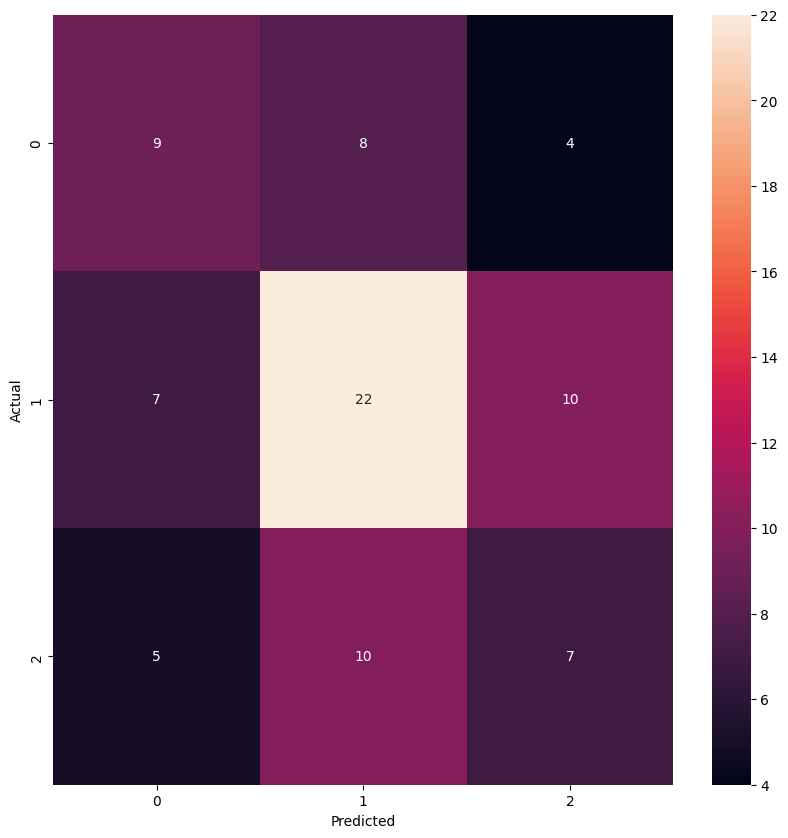

In [477]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

#y_pred = model1.predict(X_test)
#y_pred = np.argmax(y_test_predicted_knn, axis=1)
#y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_knn, y_pred_knn)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Red Neuronal Densa

In [478]:
# Estas biblioteca son complementarias, solamente para agregar visualizaciones de las redes
!pip install visualkeras --quiet
!pip install keras-visualizer --quiet
import tensorflow as tf
import numpy as np #importamos numpy porque trabajamos con arrays, la imagen se descompone en una matriz

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Para mostrar imágenes en python
from PIL import Image

In [479]:
#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [480]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)))
model1.add(tf.keras.layers.Dropout(rate=0.1))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(rate=0.1))
model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dropout(rate=0.1))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(rate=0.1))
model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(tf.keras.layers.Dropout(rate=0.1))
model1.add(tf.keras.layers.Dense(32, activation='relu'))
model1.add(tf.keras.layers.Dropout(rate=0.1))
model1.add(tf.keras.layers.Dense(16, activation='relu'))
model1.add(tf.keras.layers.Dropout(rate=0.1))
model1.add(tf.keras.layers.Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 64)                576       
                                                                 
 dropout_74 (Dropout)        (None, 64)                0         
                                                                 
 dense_86 (Dense)            (None, 128)               8320      
                                                                 
 dropout_75 (Dropout)        (None, 128)               0         
                                                                 
 dense_87 (Dense)            (None, 256)               33024     
                                                                 
 dropout_76 (Dropout)        (None, 256)               0         
                                                                 
 dense_88 (Dense)            (None, 128)             

In [481]:
print("Num training examples: ", X_train.shape[0])
print("Num test examples: ", X_test.shape[0])
print("Dimension input: ", X_train.shape)
print("Dimension output: ", y_train.shape)
print("Dimension test input: ", X_test.shape)
print("Dimension test output: ", y_test.shape)
print("Output example: ", y_train[1])

Num training examples:  123
Num test examples:  82
Dimension input:  (123, 8)
Dimension output:  (123, 3)
Dimension test input:  (82, 8)
Dimension test output:  (82, 3)
Output example:  [0. 0. 1.]


Help on function visualizer in module keras_visualizer:

visualizer(model, file_name='graph', file_format=None, view=False, settings=None)
    Visualize a Sequential model.
    
    # Arguments
    
        model: a Keras model instance.
    
        file_name: where to save the visualization.
    
        file_format: file format to save 'pdf', 'png'.
    
        view: open file after process if True.
    
        settings: dictionary of valid configurations.
    
    * change format to 'png' or 'pdf' to save visualization file



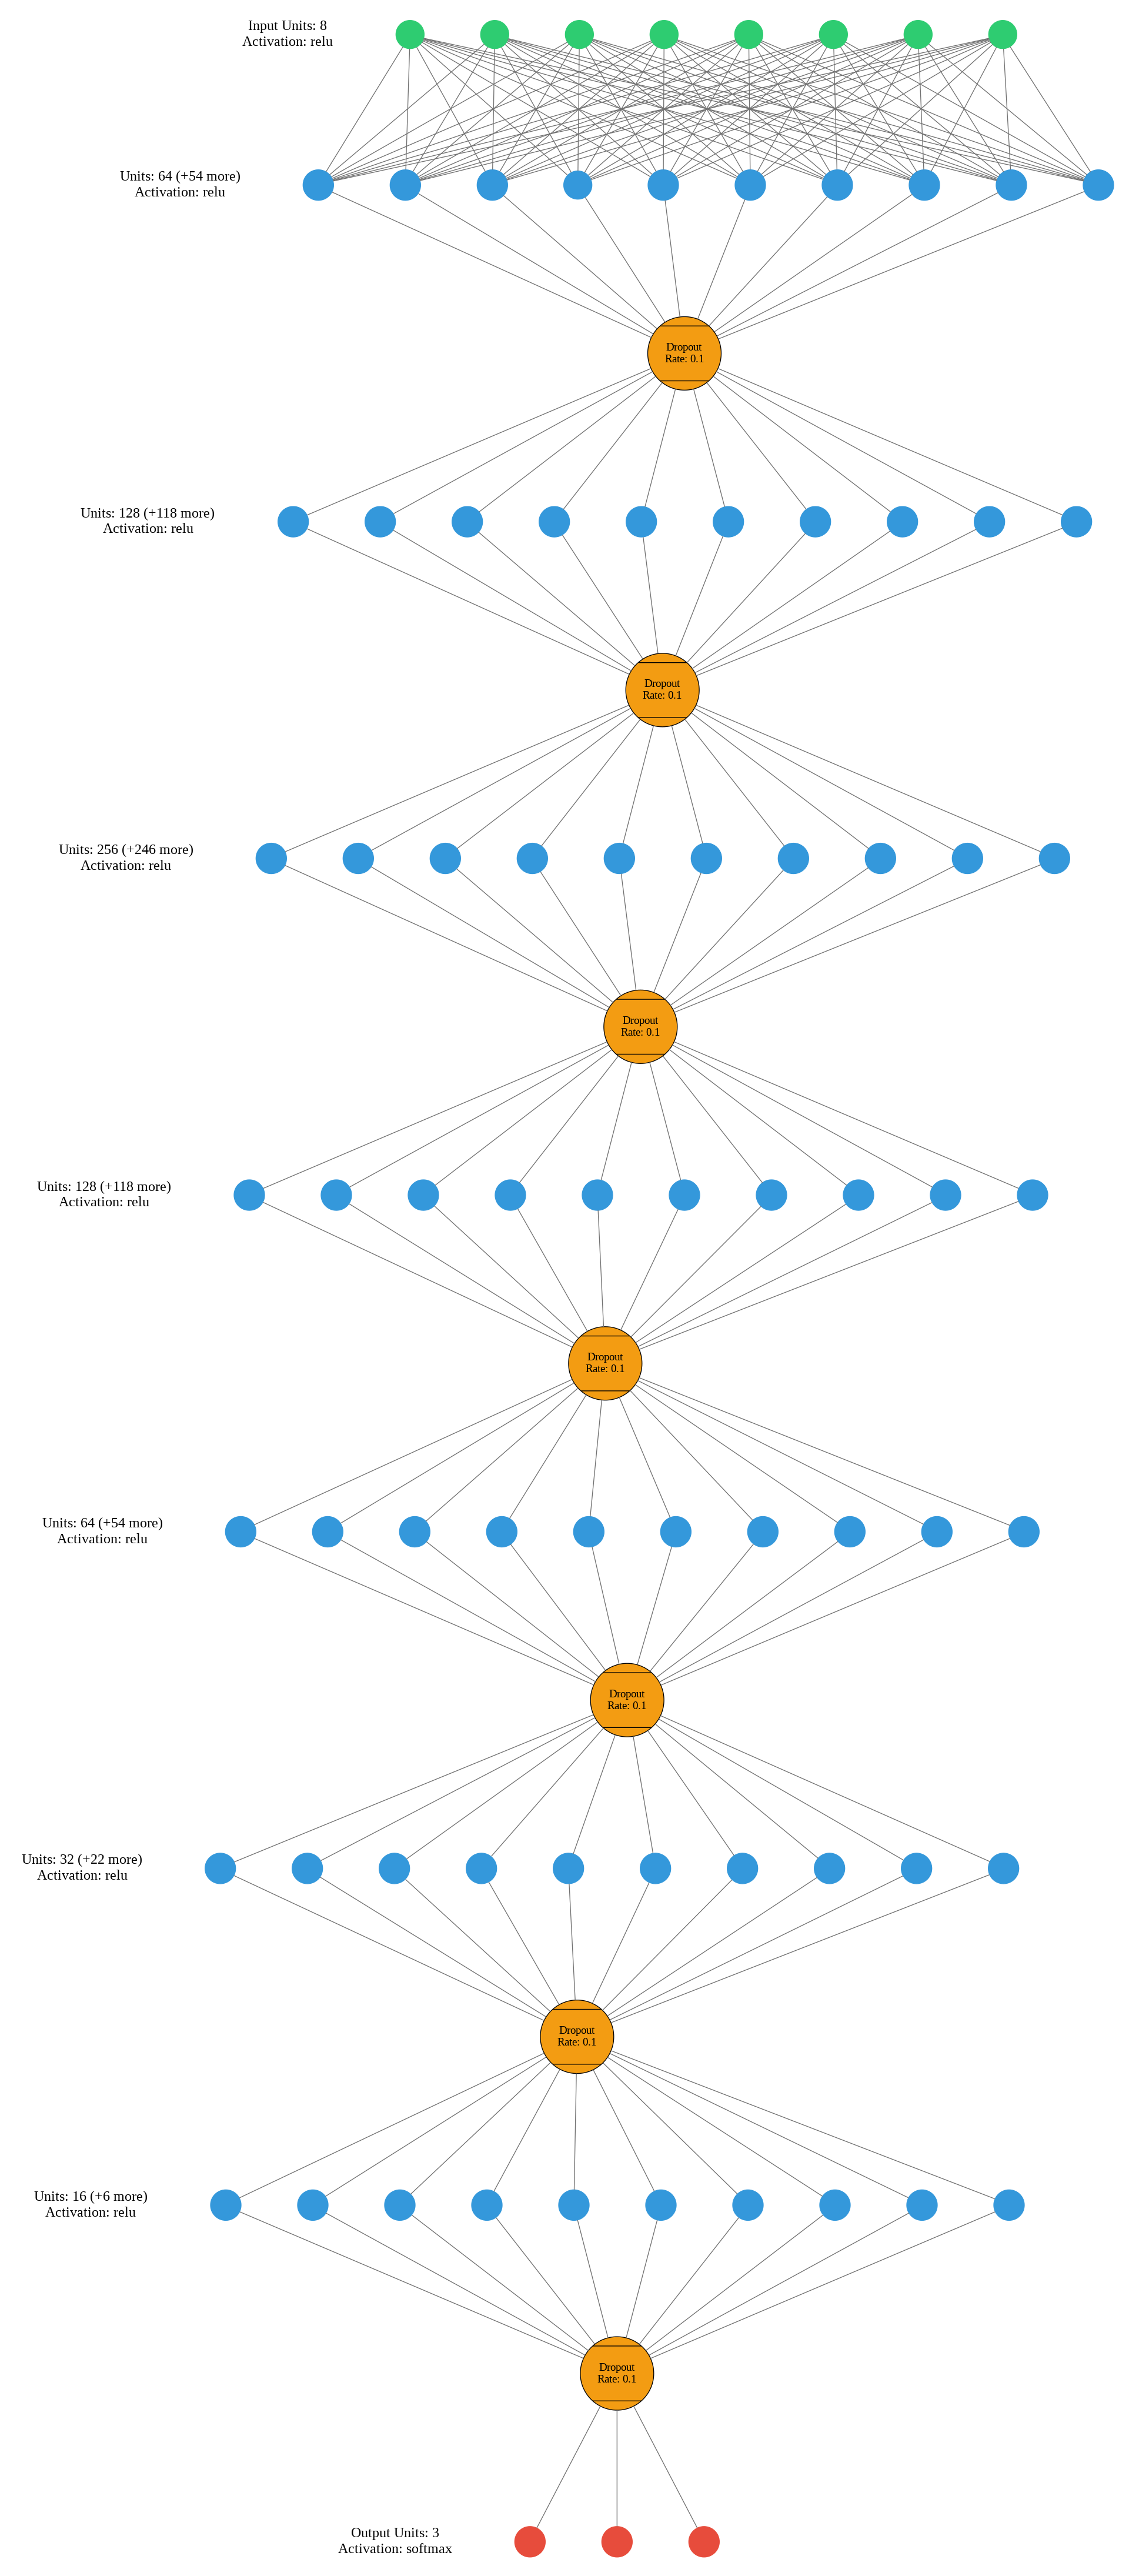

In [482]:
from keras_visualizer import visualizer
help(visualizer)
visualizer(model1, file_format='png')
img = Image.open('graph.png')
# img.resize((680, 680), Image.ANTIALIAS)
img # img.show()

<ipython-input-483-f2f378a38bdb>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.resize((200, 200), Image.ANTIALIAS)


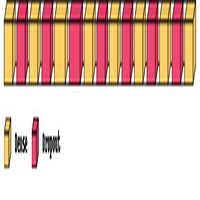

In [483]:
import visualkeras

img = visualkeras.layered_view(model1, to_file='output.png', legend=True)
img.resize((200, 200), Image.ANTIALIAS)

In [484]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=500, restore_best_weights=True)

opt = tf.keras.optimizers.Adam(learning_rate=0.0000003) # 0.0000003 para optimizar el modelo, se optó por el algoritmo de Adam basado en el descenso de gradiente. learning_rate es tasa de aprendizaje por cada iteración. ese es el valor por default.

# Compilar el modelo (asegúrate de haber ajustado las etiquetas según las recomendaciones anteriores)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',  # 'sparse_categorical_crossentropy'
                metrics=['accuracy'])

# Entrenar el modelo con Early Stopping
hist = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2500, batch_size=64, callbacks=[early_stopping])


Epoch 1/2500
2/2 [==============================] - 3s 234ms/step - loss: 1.1042 - accuracy: 0.3171 - val_loss: 1.0966 - val_accuracy: 0.4024
Epoch 2/2500
2/2 [==============================] - 0s 34ms/step - loss: 1.1031 - accuracy: 0.3252 - val_loss: 1.0966 - val_accuracy: 0.4024
Epoch 3/2500
2/2 [==============================] - 0s 31ms/step - loss: 1.1010 - accuracy: 0.3496 - val_loss: 1.0966 - val_accuracy: 0.4024
Epoch 4/2500
2/2 [==============================] - 0s 35ms/step - loss: 1.0934 - accuracy: 0.3984 - val_loss: 1.0966 - val_accuracy: 0.4024
Epoch 5/2500
2/2 [==============================] - 0s 33ms/step - loss: 1.1008 - accuracy: 0.3984 - val_loss: 1.0965 - val_accuracy: 0.4024
Epoch 6/2500
2/2 [==============================] - 0s 32ms/step - loss: 1.0967 - accuracy: 0.4228 - val_loss: 1.0965 - val_accuracy: 0.4024
Epoch 7/2500
2/2 [==============================] - 0s 49ms/step - loss: 1.1013 - accuracy: 0.3659 - val_loss: 1.0965 - val_accuracy: 0.4024
Epoch 8/2500

In [485]:
y_train.shape

(123, 3)

In [486]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('test_acc:', test_acc)

3/3 [==============================] - 0s 6ms/step - loss: 1.0956 - accuracy: 0.4390
test_acc: 0.4390243887901306


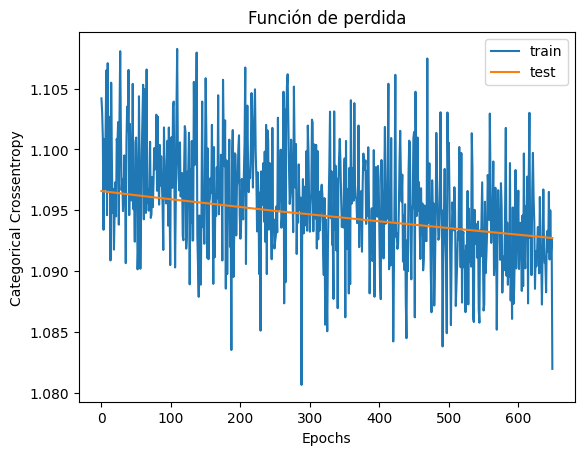

In [487]:
plt.title('Función de perdida')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend(loc = 'upper right')
plt.show()

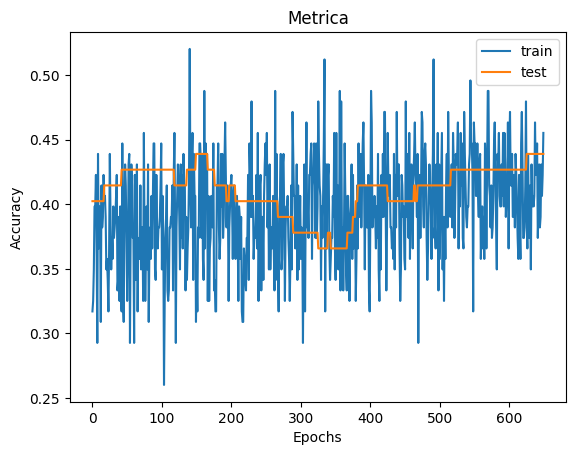

In [488]:
plt.title('Metrica')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend(loc = 'upper right')
plt.show()

3/3 [==============================] - 0s 7ms/step


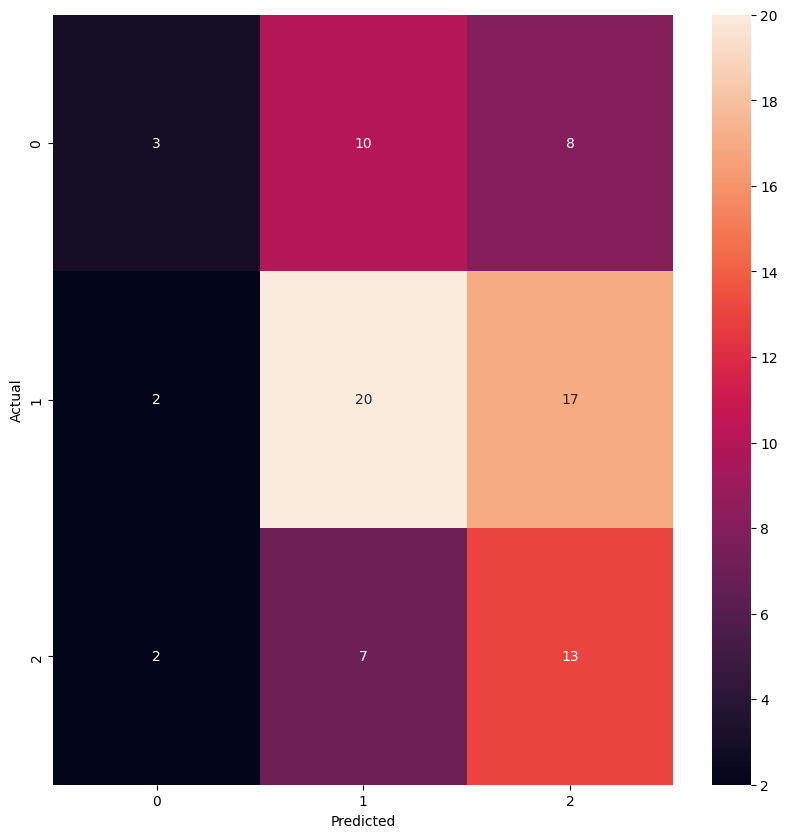

In [489]:
# prompt: confusion matrix for model1 using heatmap and including the counts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [490]:
y_pred

array([2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1])

In [491]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
print('[INFO] Evaluando red...')
decoded_y_test = y_test
decoded_predictions = y_pred

# Cálculo del reporte de clasificación
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions,
                            target_names=['Otros','Psicoanalisis', 'Conductual']))

# Cálculo de F1
print(f'F1-micro: {f1_score(decoded_y_test, decoded_predictions, average="micro")}')
print(f'F1-macro: {f1_score(decoded_y_test, decoded_predictions, average="macro")}')
print(f'F1-weighted: {f1_score(decoded_y_test, decoded_predictions, average="weighted")}')

print(f'F1 por clase:')
print('----')
f1_score_per_class = f1_score(decoded_y_test, decoded_predictions, average=None)
for label, score in zip(['Otros','Psicoanalisis', 'Conductual'], f1_score_per_class):
    print(f'\t - F1 para la clase {label}: {score}')
print('----')

# Cálculo de precision
print(f'Precision (micro): {precision_score(decoded_y_test, decoded_predictions, average="micro")}')
print(f'Precision (macro): {precision_score(decoded_y_test, decoded_predictions, average="macro")}')
print(f'Precision (weighted): {precision_score(decoded_y_test, decoded_predictions, average="weighted")}')

print(f'Precision por clase:')
print('----')
precision_score_per_class = precision_score(decoded_y_test, decoded_predictions, average=None)
for label, score in zip(['Otros','Psicoanalisis', 'Conductual'], precision_score_per_class):
    print(f'\t - Precision para la clase {label}: {score}')
print('----')

# Cálculo de recall
print(f'Recall (micro): {recall_score(decoded_y_test, decoded_predictions, average="micro")}')
print(f'Recall (macro): {recall_score(decoded_y_test, decoded_predictions, average="macro")}')
print(f'Recall (weighted): {recall_score(decoded_y_test, decoded_predictions, average="weighted")}')

print(f'Recall por clase:')
print('----')
recall_score_per_class = recall_score(decoded_y_test, decoded_predictions, average=None)
for label, score in zip(['Otros','Psicoanalisis', 'Conductual'], recall_score_per_class):
    print(f'\t - Recall para la clase {label}: {score}')
print('----')

# Cálculo de accuracy
print(f'Exactitud (accuracy): {accuracy_score(decoded_y_test, decoded_predictions)}')

[INFO] Evaluando red...
Reporte de clasificación:
               precision    recall  f1-score   support

        Otros       0.43      0.14      0.21        21
Psicoanalisis       0.54      0.51      0.53        39
   Conductual       0.34      0.59      0.43        22

     accuracy                           0.44        82
    macro avg       0.44      0.42      0.39        82
 weighted avg       0.46      0.44      0.42        82

F1-micro: 0.43902439024390244
F1-macro: 0.39131161236424394
F1-weighted: 0.421459135643988
F1 por clase:
----
	 - F1 para la clase Otros: 0.21428571428571427
	 - F1 para la clase Psicoanalisis: 0.5263157894736842
	 - F1 para la clase Conductual: 0.43333333333333335
----
Precision (micro): 0.43902439024390244
Precision (macro): 0.4370724107566213
Precision (weighted): 0.4586267911043264
Precision por clase:
----
	 - Precision para la clase Otros: 0.42857142857142855
	 - Precision para la clase Psicoanalisis: 0.5405405405405406
	 - Precision para la clase Co

## Cross Validation

In [492]:
#from sklearn.model_selection import KFold
# Model configuration
#batch_size = 32
#img_width, img_height, img_num_channels = 32, 32, 3
#loss_function = categorical_crossentropy
#no_classes = 6
#no_epochs = 1000
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
#verbosity = 1
#num_folds = 10

# Load CIFAR-10 data
#(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
#input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
#input_train = input_train.astype('float32')
#input_test = input_test.astype('float32')

# Normalize data
#input_train = input_train / 255
#input_test = input_test / 255

# Define per-fold score containers
#acc_per_fold = []
#loss_per_fold = []

# Merge inputs and targets
#inputs = np.concatenate((input_train, input_test), axis=0)
#targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
#kfold = KFold(n_splits=3, shuffle=True)

# K-fold Cross Validation model evaluation
#fold_no = 1
#for train, test in kfold.split(X, y):

  # Define the model architecture
  #model2 = tf.keras.models.Sequential()
  #model2.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)))
  #model2.add(tf.keras.layers.Dropout(rate=0.2))
  #model2.add(tf.keras.layers.Dense(256, activation='relu'))
  #model2.add(tf.keras.layers.Dropout(rate=0.2))
  #model2.add(tf.keras.layers.Dense(128, activation='relu'))
  #model2.add(tf.keras.layers.Dropout(rate=0.2))
  #model2.add(tf.keras.layers.Dense(64, activation='relu'))
  #model2.add(tf.keras.layers.Dropout(rate=0.2))
  #model2.add(tf.keras.layers.Dense(32, activation='relu'))
  #model2.add(tf.keras.layers.Dense(16, activation='relu'))
  #model2.add(tf.keras.layers.Dense(6, activation='softmax'))

  # Compile the model
  #model2.compile(loss='categorical_crossentropy',
  #              optimizer=optimizer,
  #              metrics=['accuracy'])


  # Generate a print
  #print('------------------------------------------------------------------------')
  #print(f'Training for fold {fold_no} ...')

  # Fit data to model
  #history = model2.fit(X[train], y[train],
  #            batch_size=batch_size,
  #           epochs=no_epochs,
  #            verbose=verbosity)

  # Generate generalization metrics
  #scores = model2.evaluate(X[test], y[test], verbose=0)
  #print(f'Score for fold {fold_no}: {model2.metrics_names[0]} of {scores[0]}; {model2.metrics_names[1]} of {scores[1]*100}%')
  #acc_per_fold.append(scores[1] * 100)
  #loss_per_fold.append(scores[0])

  # Increase fold number
  #fold_no = fold_no + 1

# == Provide average scores ==
#print('------------------------------------------------------------------------')
#print('Score per fold')
#for i in range(0, len(acc_per_fold)):
#  print('------------------------------------------------------------------------')
#  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
#print('------------------------------------------------------------------------')
#print('Average scores for all folds:')
#print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
#print(f'> Loss: {np.mean(loss_per_fold)}')
#print('------------------------------------------------------------------------')